In [1]:
# -*- coding: utf-8 -*-
'''
Convolutional Neural Network
'''

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.layers import Dropout
from keras import backend as K


class LeNet:
    @staticmethod
    def build(input_shape_width, input_shape_height, classes, 
              weight_path = '', input_shape_depth = 3):
        '''
        weight_path: a .hdf5 file. If exists, we can load model.
        '''
        
        # initialize the model
        model = Sequential()
        
        input_shape = (input_shape_height, input_shape_width, 
                       input_shape_depth)
        # if we are using "channels first", update the input shape
        if K.image_data_format() == 'channels_first':
             input_shape = (input_shape_depth, input_shape_height, 
                            input_shape_width)
        
        # first Convolution + relu + pooling layer
        model.add(Conv2D(filters = 20, kernel_size = (5, 5), 
                         padding = 'same', input_shape = input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
        
        # second convolutional layer
        model.add(Conv2D(filters = 50, kernel_size = (5, 5), 
                         padding = 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Flattening
        model.add(Flatten())
        
        # Full connection
        model.add(Dense(units = 500))
        model.add(Activation('relu'))
        
        # output layer
        model.add(Dense(units = classes))
        model.add(Activation('softmax'))
        
        if weight_path:
            model.load_weights(weight_path)
            
        # return the constructed network architecture
        return model
      


Using TensorFlow backend.


[INFO] 下载数据集...
[INFO] 编译模型...
[INFO] 训练模型...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.9397 - accuracy: 0.7500 - val_loss: 0.2878 - val_accuracy: 0.9127
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2541 - accuracy: 0.9250 - val_loss: 0.1933 - val_accuracy: 0.9430
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1833 - accuracy: 0.9464 - val_loss: 0.1581 - val_accuracy: 0.9518
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1454 - accuracy: 0.9575 - val_loss: 0.1217 - val_accuracy: 0.9637
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1198 - accuracy: 0.9647 - val_loss: 0.1061 - val_accuracy: 0.9660
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1031 - accuracy: 0.9697 - val_loss: 0.0813 - val_accuracy: 0.9760
Epoch 7/10
60000/60000

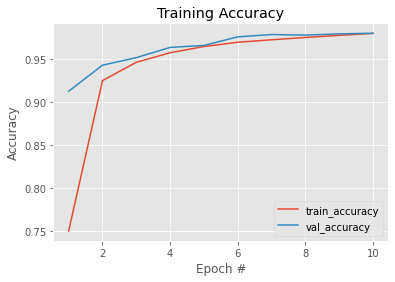

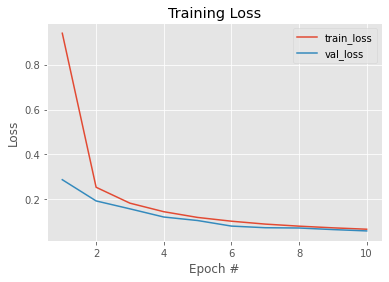

In [13]:
# -*- coding: utf-8 -*-
'''
train mnist    
测试
image is grayscale with 28*28 size.
'''

# 导入包
# from lenet import LeNet
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 全局常量
LR = 0.01
BATCH_SIZE = 128
EPOCHS = 10

# 全局变量
accuracy_plot_path = 'plots/accuracy.png'
loss_plot_path = 'plots/loss.png'
output_model_path = 'models/mnist.hdf5'

################################################
# 第一部分：数据预处理
# grab the MNIST dataset
print('[INFO] 下载数据集...')
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# matrix shape should be: num_samples x rows x columns x depth
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0,1]
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

# transform the training and testing labels into vectors 
#in the range [0, classes]
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)


################################################3
# 第二部分：创建并训练模型
# initialize the optimizer and model
print('[INFO] 编译模型...')
opt = SGD(lr = LR)
model = LeNet.build(28,28,10,'',1)
model.compile(loss = 'categorical_crossentropy', 
              optimizer=opt, metrics = ['accuracy'])

# train model
print('[INFO] 训练模型...')
H = model.fit(trainData, trainLabels, 
              validation_data=(testData, testLabels),
              batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = 1)


################################################
# 第三部分：评估模型

# 画出accuracy曲线
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, EPOCHS+1), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(1, EPOCHS+1), H.history["val_accuracy"],label="val_accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(accuracy_plot_path)

# 画出loss曲线
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1,EPOCHS+1),H.history["loss"], label="train_loss")
plt.plot(np.arange(1,EPOCHS+1),H.history["val_loss"],label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig(loss_plot_path)

# 打印分类报告
# show accuracy on the testing set
print('[INFO] 评估模型...')
predictions = model.predict(testData, batch_size=32)
print(classification_report(testLabels.argmax(axis=1),
	                        predictions.argmax(axis=1), 
                            target_names=[str(i) for i in range(10)]))


################################################
# 第四部分：保存模型
model.save(output_model_path)


In [11]:
!pwd

/content/cnn_emotion


In [10]:
%cd cnn_emotion

/content/cnn_emotion
